Q1 - 1. 제공된 boston_csv.csv 파일을 사용하여 pandas 데이터 프레임 객체를 만든다, 결측치 코드인 na와 NaN이 모두 실제 결측치로 되도록 한다.  

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('./boston_csv.csv')

In [2]:
print(df.shape)

(506, 15)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    object 
 5   RM         506 non-null    float64
 6   AGE        505 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          505 non-null    float64
 12  LSTAT      506 non-null    object 
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 59.4+ KB
None


In [4]:
print(df.isnull().sum())

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          1
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            1
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64


NaN이 들어있는 row를 모두 찾는다.

In [5]:
df[df.isna().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,NaN,4.0900,1,296,15.3,396.9,4.98,24.0,0
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,NaN,14.33,16.8,0


In [6]:
NaN_rows=df[df.isna().any(axis=1)]
df.drop(index=NaN_rows.index,inplace=True)

na가 들어있는 row를 모두 찾는다.

In [7]:
df[(df == 'na').any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
1,0.02731,0.0,7.07,0,na,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.9,na,11.9,0


In [8]:
na_rows = df[(df == 'na').any(axis=1)]
df.drop(index=na_rows.index,inplace=True)

Q1 - 2. 이와 같은 결측치가 있는 관측치를 모두 제거한후 df의 shape는 (502,15)이다.

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.1,17.5,0
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0


Q2 - 1. describe 메소드를 적용해서 각 변수병 요약 통계를 구한다.

In [10]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS          RM         AGE   
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000  \
mean     3.641708   11.418327   11.163765    0.069721    6.284805   68.514542   
std      8.629979   23.396912    6.873538    0.254930    0.705085   28.247125   
min      0.009060    0.000000    0.460000    0.000000    3.561000    2.900000   
25%      0.082492    0.000000    5.190000    0.000000    5.884250   44.550000   
50%      0.262660    0.000000    9.690000    0.000000    6.208500   77.150000   
75%      3.689388   12.500000   18.100000    0.000000    6.628000   94.100000   
max     88.976200  100.000000   27.740000    1.000000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B        MEDV   
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000  \
mean     3.797274    9.605578  409.095618   18.456574  356.353506   22.564343   
std      2.111828    8.7171

Q2 - 2. 상관관계를 구한후 seaborn 라이브러리의 heatmap 을 구현한다. 'LSTAT'는 'MEDV'와 -0.7의 상관관계를 갖고 'TAX'는 'MEDV'와 -0.5의 상관관계를 갖는다는걸 확인할 수 있다.

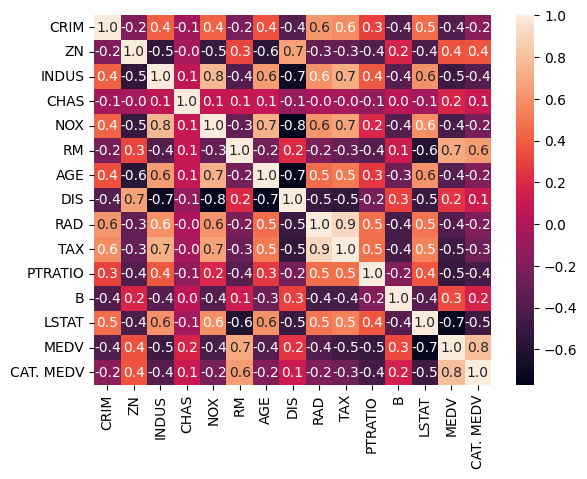

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.1f',cbar=True)
plt.show()

Q3 - 다음과 같은 단순회귀분석 모형을 Training Set과 Test Set을 통해 구현하라
	모집단의 하위계층의 비율(LSTAT)이 독립변수
	본인 소유의 주택가격(중앙값)인 MEDV가 종속변수 
	Training set이 표본의 75%를 차지한다.

In [12]:
X=df['LSTAT']
y=df['MEDV']

 Training Set에대해서는 회귀 분석 추정 계수 및 R2 값 mean squared error 값을 보고한다.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test=train_test_split(X.values.reshape(-1,1), y, train_size=0.75, random_state=42)

lr=LinearRegression()
lr.fit(X_train,y_train)
coef=lr.coef_[0]
#predicted=lr.predict(X_test)
#R2=np.round(r2_score(y_test, predicted),2)
predicted=lr.predict(X_train)
R2=np.round(r2_score(y_train, predicted),2)
mse=np.round(mean_squared_error(y_train, predicted),2)
print('Training Set에 대해서 - (회귀분석 추청 계수: {coef}, R2: {R2}, MSE: {mse})'.format(R2=R2, mse=mse, coef=coef))

Training Set에 대해서 - (회귀분석 추청 계수: -0.9635248699451131, R2: 0.54, MSE: 41.35)


 Training Set에대해서는 회귀 분석 추정 계수 값을 바탕으로 Test Set에서 예측한 후 mean squared error 값을 보고한다.

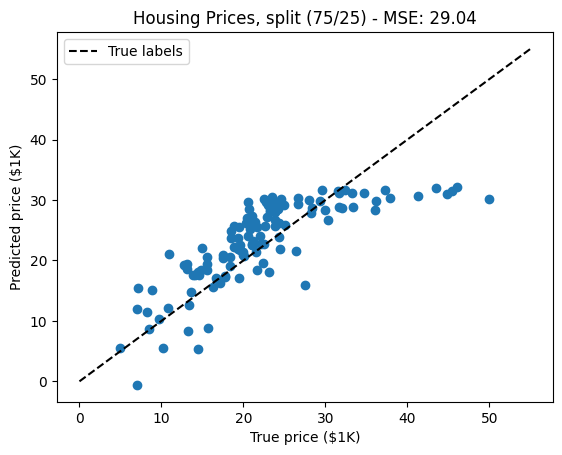

In [14]:
predicted=lr.predict(X_test)
plt.scatter(y_test,predicted)
#R2=np.round(r2_score(y_test, predicted),2)
mse=np.round(mean_squared_error(y_test, predicted),2)
plt.title('Housing Prices, split (75/25) - MSE: {mse}'.format(mse=mse))

xlim = [0, 55]
ylim = [0, 55]
plt.plot(xlim, ylim, '--k', label=f"True labels")
plt.xlabel("True price ($1K)")
plt.ylabel("Predicted price ($1K)")
plt.legend()
plt.show()

Q4 - 다음과 같은 다중회귀분석 모형을 Training Set과 Test Set을 통해 구현하라.
	모집단의 하위계층의 비율(LSTAT)과 10,000 달러 당 재산세율(TAX)가  독립변수
	본인 소유의 주택가격(중앙값)인 MEDV가 종속변수 
	Training set이 표본의 75%를 차지한다.

In [15]:
X2=df[['LSTAT','TAX']]
y2=df['MEDV']

 Training Set에대해서는 회귀 분석 추정 계수 및 R2 값 mean squared error 값을 보고한다.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test=train_test_split(X2, y2, train_size=0.75, random_state=42)

lr=LinearRegression()
lr.fit(X_train,y_train)

predicted=lr.predict(X_train)
coef=lr.coef_

R2=np.round(r2_score(y_train, predicted),2)
mse=np.round(mean_squared_error(y_train, predicted),2)
print('Training Set에 대해서 - (회귀분석 추청 계수: {coef}, R2: {R2}, MSE: {mse})'.format(R2=R2, mse=mse, coef=coef))

Training Set에 대해서 - (회귀분석 추청 계수: [-0.90463483 -0.00480577], R2: 0.54, MSE: 40.86)


 Training Set에대해서는 회귀 분석 추정 계수 값을 바탕으로 Test Set에서 예측한 후 mean squared error 값을 보고한다.

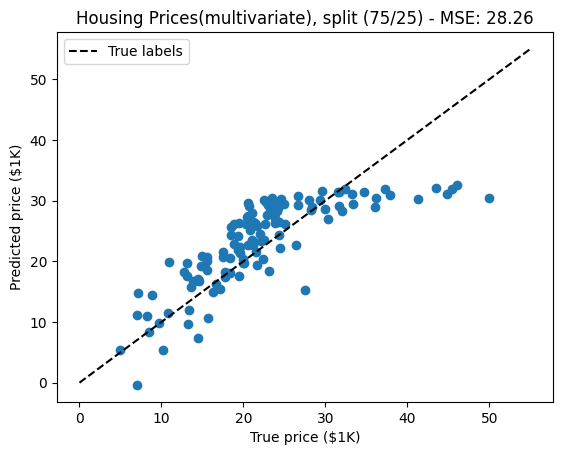

In [17]:
predicted=lr.predict(X_test)
plt.scatter(y_test,predicted)

mse=np.round(mean_squared_error(y_test, predicted),2)
plt.title('Housing Prices(multivariate), split (75/25) - MSE: {mse}'.format(mse=mse))

xlim = [0, 55]
ylim = [0, 55]
plt.plot(xlim, ylim, '--k', label=f"True labels")
plt.xlabel("True price ($1K)")
plt.ylabel("Predicted price ($1K)")
plt.legend()
plt.show()